In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../day_16/src')
from eda_toolkit import generate_numeric_summary, generate_relationship_analysis, generate_categorical_analysis

df_pricing = pd.read_csv('../data/product_pricing.csv')
df_pricing.head()

,product_id,manufacturing_cost,competitor_avg_price,brand_strength,market_demand_score,seasonality,optimal_price
0,1,77.40,193.64,2,0.385,medium,150.04
1,2,23.85,60.96,4,0.951,medium,61.30
2,3,82.09,211.80,2,0.686,low,132.18
3,4,60.25,137.24,4,0.857,low,121.81
4,5,39.84,88.85,3,0.533,low,73.49


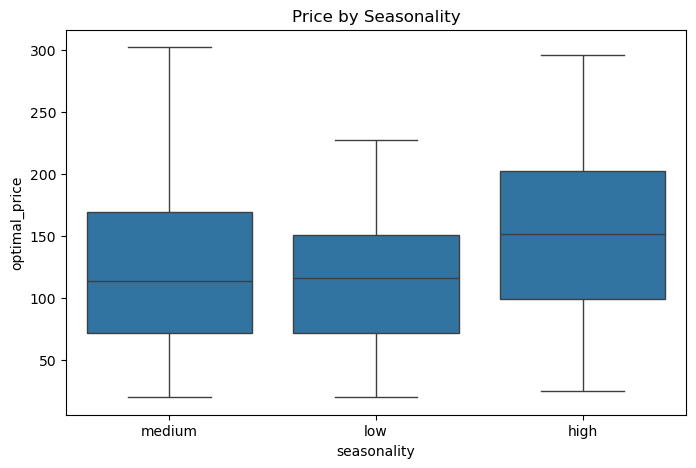

In [7]:
# Skip this for pricing data
# generate_categorical_analysis(df_pricing)

# Just check the seasonality manually:
df_pricing['seasonality'].value_counts()

# And plot it yourself:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_pricing, x='seasonality', y='optimal_price')
plt.title('Price by Seasonality')
plt.show()

{'heatmap': <Figure size 1000x800 with 2 Axes>,
 'pairplot': <Figure size 1250x1250 with 30 Axes>,
 'top_correlations': [('manufacturing_cost',
   'competitor_avg_price',
   np.float64(0.9517967753073653)),
  ('competitor_avg_price',
   'manufacturing_cost',
   np.float64(0.9517967753073653)),
  ('manufacturing_cost', 'optimal_price', np.float64(0.8950581416378859)),
  ('optimal_price', 'manufacturing_cost', np.float64(0.8950581416378859)),
  ('optimal_price', 'competitor_avg_price', np.float64(0.8468470341243893))]}

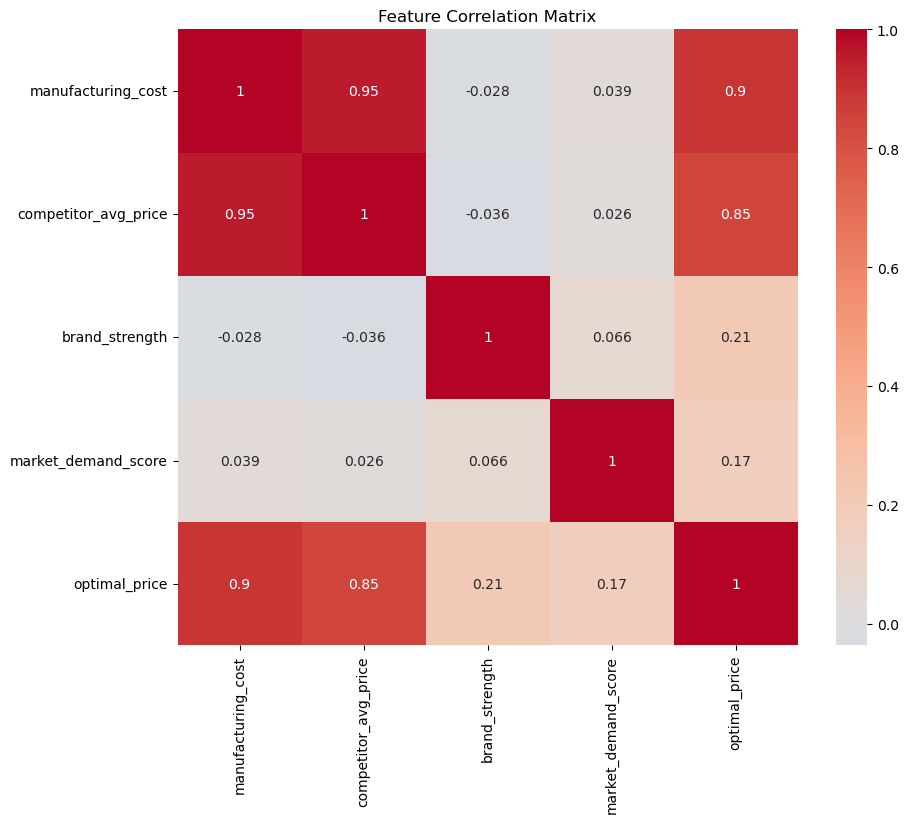

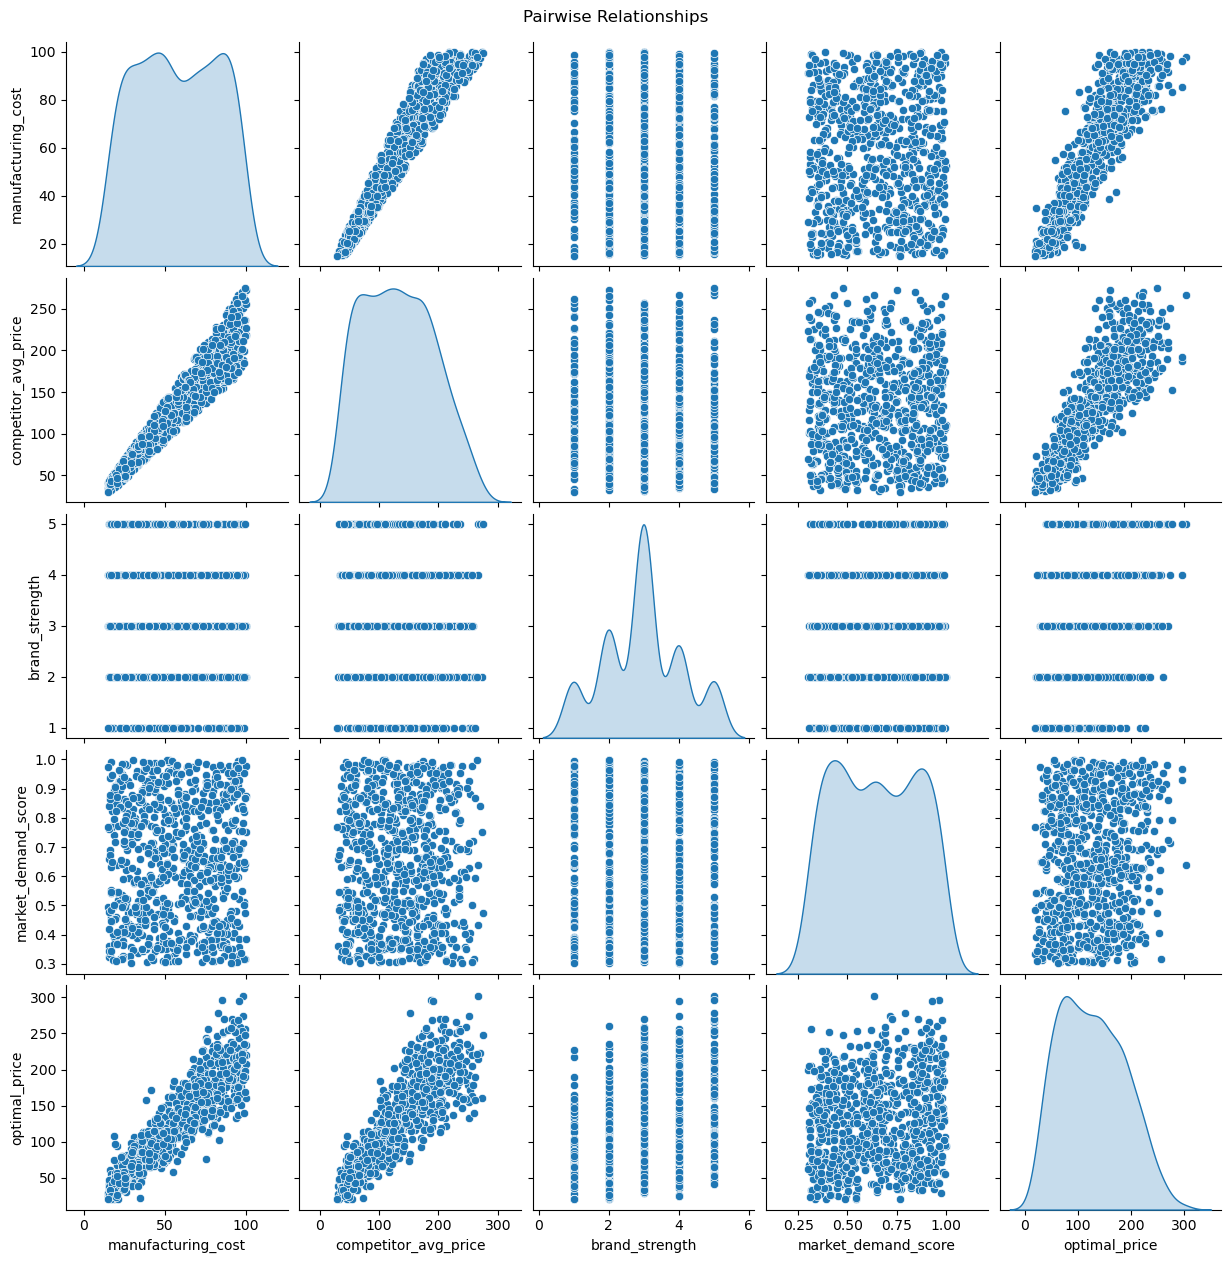

In [10]:
generate_relationship_analysis(df_pricing)

seasonality
high      151.569612
low       113.534343
medium    122.012677
Name: optimal_price, dtype: float64

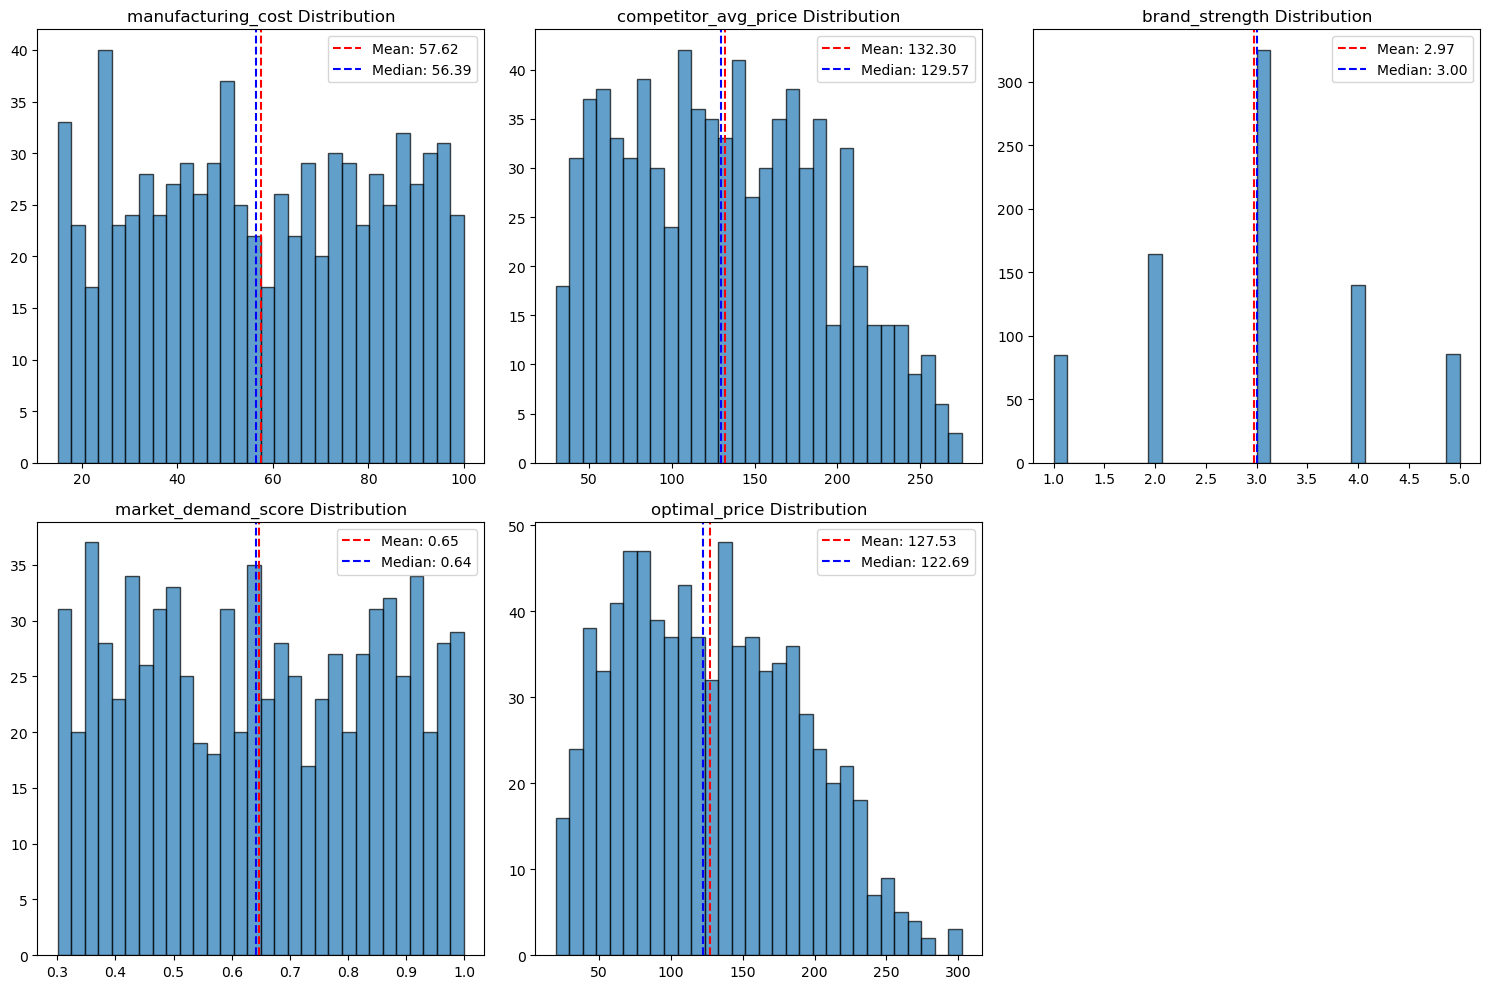

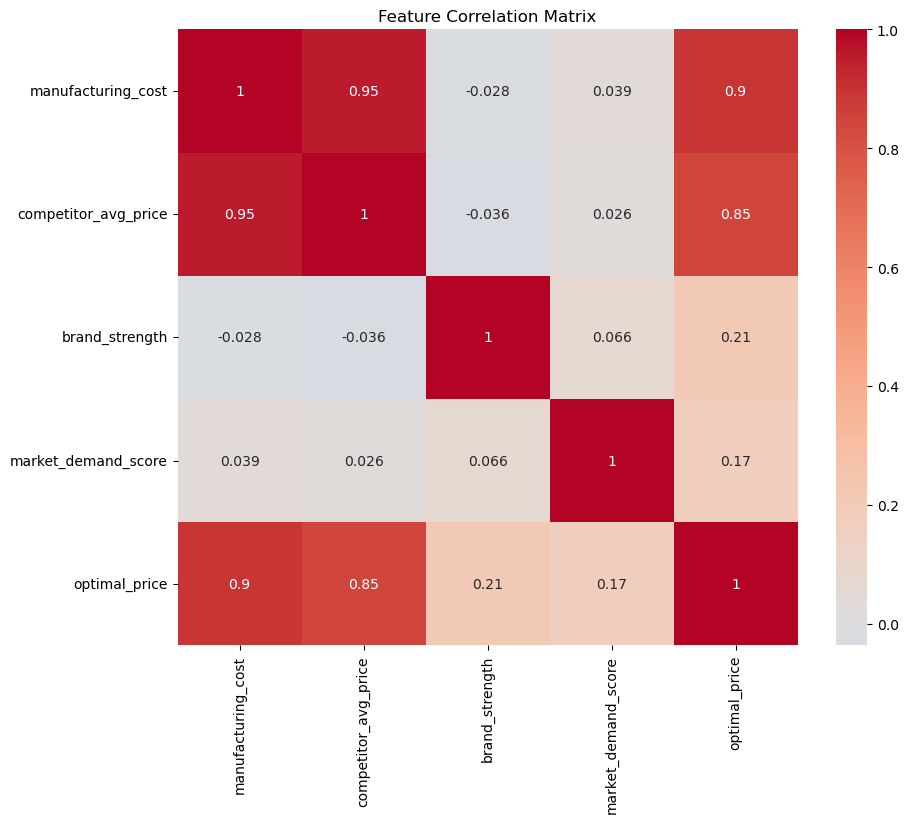

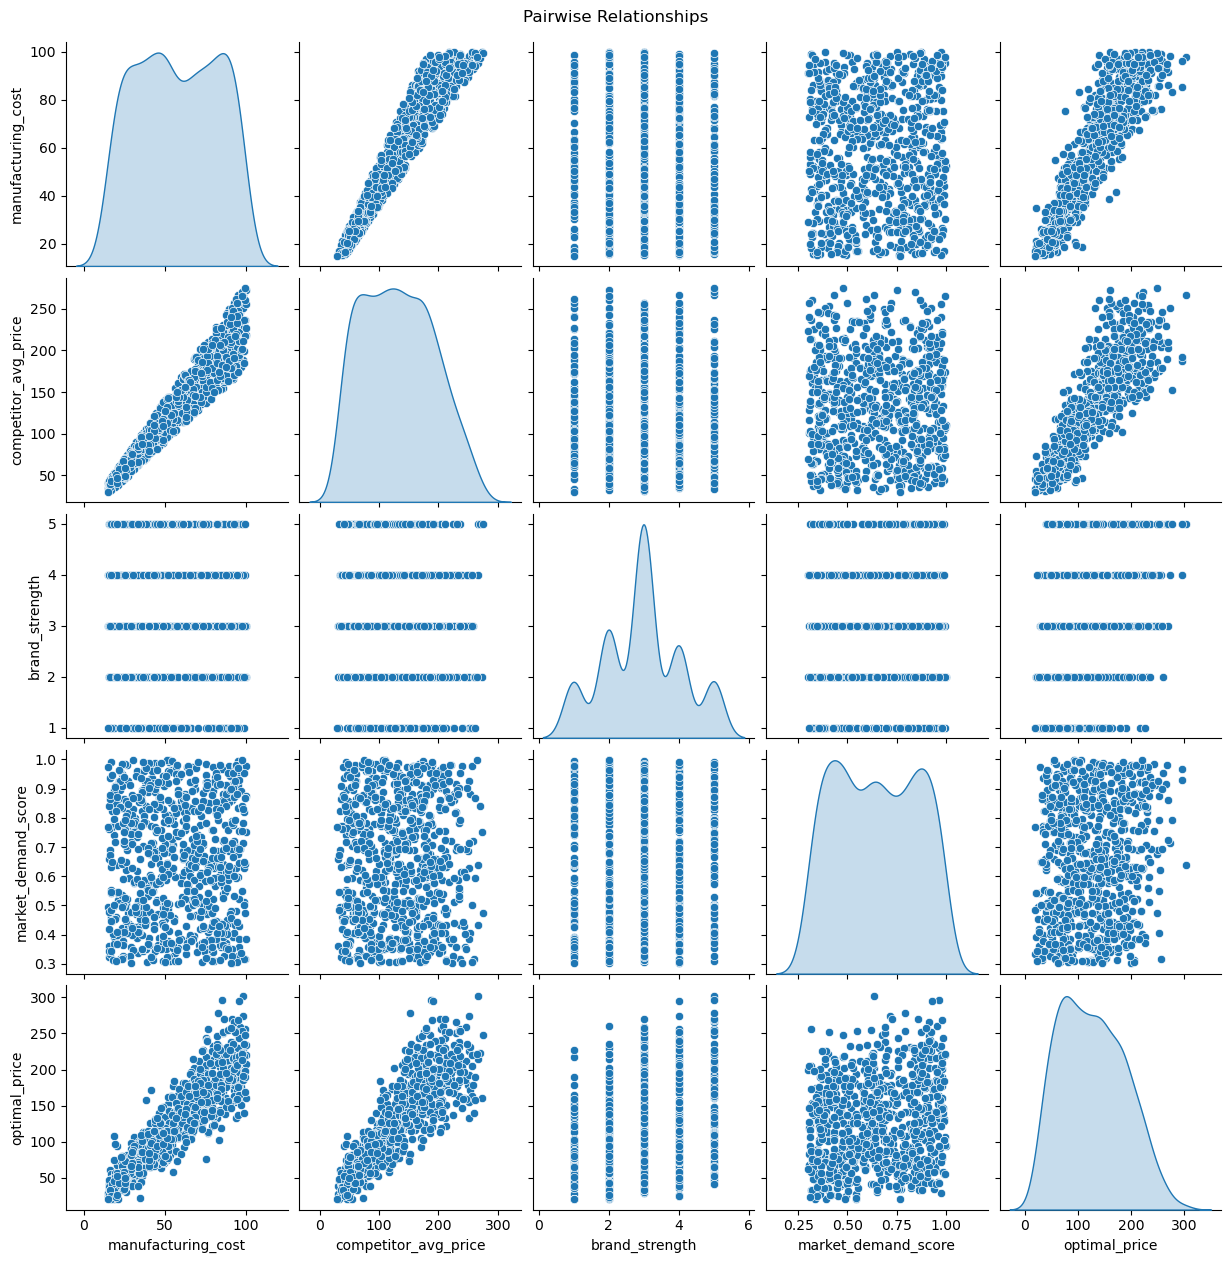

In [9]:
# What you SHOULD run:
generate_numeric_summary(df_pricing)
generate_relationship_analysis(df_pricing)

# Check seasonality manually:
df_pricing.groupby('seasonality')['optimal_price'].mean()

In [11]:
"""
PROBLEM FORMULATION: Product Pricing Prediction

1. PROBLEM TYPE: Regression
   - Target: 'optimal_price' (continuous, $20-$400 range)
   - Predicting optimal price point for products

2. FEATURE ANALYSIS:
   - Manufacturing cost (0.90): Strongest predictor - cost drives price
   - Competitor price (0.85): Strong - market-based pricing
   - Brand strength: Likely important (categorical 1-5)
   - Market demand: Moderate impact expected
   - Seasonality: Categorical - high/medium/low season

3. RECOMMENDED METRICS:
   Primary: RMSE (Root Mean Squared Error)
     - Penalizes large pricing errors more
     - Better for business - big mistakes cost more
   
   Secondary: MAE (Mean Absolute Error)
     - Average $ off - easy to explain to stakeholders
   
   Monitor: R² (R-squared)
     - How much variance do we explain?

4. DATA CHARACTERISTICS:
   - Strong linear relationships with cost/competitor price
   - Potential outliers present (pricing mistakes)
   - Mix of numeric and categorical features

5. SPLITTING STRATEGY:
   - 60% train, 20% validation, 20% test
   - No stratify needed (continuous target)
   - Random seed = 42 for reproducibility
"""

# Implement the split
from sklearn.model_selection import train_test_split

# Features and target
X = df_pricing.drop(['optimal_price', 'product_id'], axis=1)
y = df_pricing['optimal_price']

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
    # Note: No stratify for regression!
)

# Second split: separate validation from train
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 0.25 * 0.8 = 0.2 of original
    random_state=42
)

# Verify splits
print("Split sizes:")
print(f"  Train: {len(X_train)} ({len(X_train)/len(df_pricing)*100:.1f}%)")
print(f"  Val:   {len(X_val)} ({len(X_val)/len(df_pricing)*100:.1f}%)")
print(f"  Test:  {len(X_test)} ({len(X_test)/len(df_pricing)*100:.1f}%)")

print("\nTarget distribution:")
print(f"  Train: ${y_train.mean():.2f} ± ${y_train.std():.2f}")
print(f"  Val:   ${y_val.mean():.2f} ± ${y_val.std():.2f}")
print(f"  Test:  ${y_test.mean():.2f} ± ${y_test.std():.2f}")

Split sizes:
  Train: 480 (60.0%)
  Val:   160 (20.0%)
  Test:  160 (20.0%)

Target distribution:
  Train: $128.30 ± $61.49
  Val:   $129.70 ± $61.61
  Test:  $123.03 ± $58.38
